In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
exp_dir = 'experiments/first_exp/'

const_df = pd.read_csv(exp_dir + 'const_run_499.csv', index_col = 0)

In [3]:
const_df

,Unnamed: 0,total_score_hist,u_hist,speed_hist
0,0,0.000000,1.171867,1.000000
1,1,0.000000,1.171867,1.034373
2,2,0.000000,1.171867,1.061872
3,3,0.000000,1.171867,1.083871
4,4,0.000000,1.171867,1.101470
...,...,...,...,...
495,495,14.066780,1.171867,1.171867
496,496,14.110493,1.171867,1.171867
497,497,14.153579,1.171867,1.171867
498,498,14.195978,1.171867,1.171867


<Axes: >

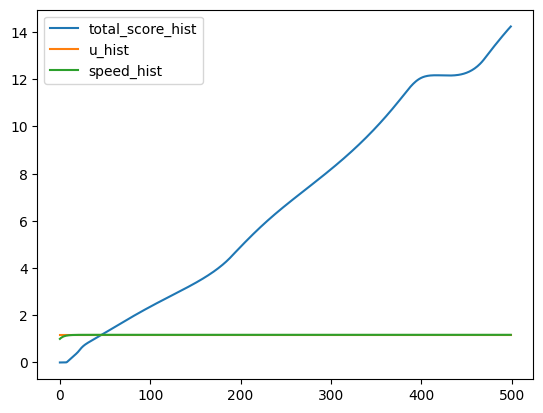

In [6]:
const_df.plot()